In [73]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
df = pd.read_csv('Neg_RPL_serum_Stats05-2_ORP.csv')

In [75]:
df.head()

,Unnamed: 0,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,...,slope,intercept,rvalue,pvalue,stderr,intercept_stderr,rank,(I/m)Q,(I/m)Q - p,BH_sig
0,39530,39530,2.056,725.29413,Unknown,[M-H]-,NaN,0.344,False,NaN,...,0.757824,2.744984,0.676027,0.000002,0.135800,0.124917,1,0.000001,-0.000001,0
1,9846,9846,0.149,227.20213,Myristic acid,[M-H]-,NaN,0.511,True,28.03,...,0.574356,2.917640,0.604336,0.000046,0.124484,0.114508,2,0.000002,-0.000044,0
2,11921,11921,3.263,255.11024,"w/o MS2:5,7-Dihydroxyflavanone",[M-H]-,NaN,0.022,True,NaN,...,-1.081816,4.587479,-0.593738,0.000068,0.241029,0.221714,3,0.000003,-0.000065,0
3,46684,46684,1.889,935.99426,Unknown,[M-H]-,ion correlated with 14636; ion correlated with...,0.011,False,NaN,...,0.574325,2.920406,0.554478,0.000250,0.141710,0.130354,4,0.000004,-0.000245,0
4,14432,14432,19.961,290.21326,Unknown,[M-H]-,ion correlated with 19042; ion correlated with...,0.011,True,NaN,...,-1.112916,4.934230,-0.550558,0.000282,0.277421,0.255190,5,0.000005,-0.000277,0


In [76]:
#df = df[(df['Sodium_Adduct'] == 0) & (df['Adduct_filter']== 0)]
#df = df[(df['Potasium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
#df = df[(df['Ammonium_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
#df = df[(df['ACN_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
#df = df[(df['Formate_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
#df = df[(df['H2O_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
#df = df[(df['CO2_Adduct'] == 0) & (df['Adduct_filter'] == 0)]
#df = df[df['pos_neg_dup'] == 0]

In [77]:
df1 = df.set_index('Alignment ID')
df1 = df1.loc[:, '0_Cornell_Pos_S-09_LMT_PS_PMM_RP':'1_Cornell_Pos_S-50_LMH_LCT_PS_PMM']
dfPS = df.filter(regex='PS')
dfO = df.filter(regex='O')
#dfblank = df.filter(regex='blank')

In [78]:
df1 = df1.T
df2 = df1

In [79]:
df1.head()

Alignment ID,39530,9846,11921,46684,14432,20093,5657,17299,43007,28028,...,41130,48401,2841,946,28281,20037,16730,48155,22872,41099
0_Cornell_Pos_S-09_LMT_PS_PMM_RP,2.365849,2.779704,4.759630,3.140511,4.000738,3.140324,3.548625,1.610470,3.819317,2.889955,...,6.888226,3.888212,3.169230,4.400296,3.713516,3.003132,4.124258,4.308743,4.851814,4.705821
0_Cornell_Pos_S-17_LCC_LMH_LCT_PS_PMM_RP,3.144434,3.522877,4.099241,2.492233,3.847644,2.125813,2.825483,3.035403,4.644970,3.273359,...,6.251784,3.804427,3.097454,5.013208,3.961150,3.307394,2.960583,3.709938,4.679074,4.040596
0_Cornell_Pos_S-24_LCC_LMH_LCT_PS_PMM_RP,2.727412,2.484195,3.671000,2.930952,4.644358,2.617403,3.167189,1.776404,3.895662,3.262962,...,6.196721,3.701975,3.589959,4.059538,3.542270,3.541016,3.131000,3.436866,4.888442,3.742881
0_Cornell_Pos_S-29_RP,2.713587,2.939340,5.345944,2.854361,4.792574,3.697400,3.033179,3.346445,3.647169,2.863188,...,4.021368,3.824475,2.994655,4.478523,3.769102,3.356823,4.664524,5.358024,4.475548,2.901009
0_Cornell_Pos_S-35_LCC_LMT_LMH_LCT_PS_PMM_RP,2.519570,2.353057,4.955685,3.320752,5.604095,2.568669,2.315765,3.134886,3.626448,3.665211,...,4.765583,3.597848,3.730877,4.841178,3.721142,3.582175,4.185145,3.579325,4.583624,4.252343


In [80]:
df1['color_MC'] = np.where(df1.index.str.contains('PS'), 'deeppink', np.where(df1.index.str.contains('O'),'dodgerblue', 'gray'))
df1['color_LowConc'] = 'darkgray'
df1['color_LowMot'] = 'darkgray'
df1['color_LowMorph'] = 'darkgray'
df1['color_LowCount'] = 'darkgray'
df1['color_PoorMotMorph'] = 'darkgray'
df1['color_highORP'] = 'darkgray'
df1['color_None'] = 'orangered'
df1['color_Inst'] = 'silver'
df1.loc[df1.index.str.contains('LCC'), 'color_LowConc'] = 'orange'
df1.loc[df1.index.str.contains('LMT'), 'color_LowMot'] = 'green'
df1.loc[df1.index.str.contains('LMH'), 'color_LowMorph'] = 'chartreuse'
df1.loc[df1.index.str.contains('LCT'), 'color_LowCount'] = 'purple'
#df1.loc[df1.index.str.contains('PS'), 'color_PoorSemen'] = 'deeppink'
df1.loc[df1.index.str.contains('PMM'), 'color_PoorMotMorph'] = 'yellow'
df1.loc[df1.index.str.contains('RP'), 'color_highORP'] = 'red'
df1.loc[df1.index.str.contains('O'), 'color_None'] = 'black'
df1.loc[df1.index.str.contains('R1'), 'color_Inst'] = 'maroon'
df1.loc[df1.index.str.contains('R2'), 'color_Inst'] = 'lightsalmon'


In [81]:
df12 = df1.loc[:, 'color_MC':'color_Inst']
df11 = df1.drop(['color_MC', 'color_Inst', 'color_LowConc', 'color_LowMot', 'color_LowMorph', 'color_LowCount', 'color_PoorMotMorph', 'color_highORP', 'color_None'], axis=1)

In [82]:
df12

Alignment ID,color_MC,color_LowConc,color_LowMot,color_LowMorph,color_LowCount,color_PoorMotMorph,color_highORP,color_None,color_Inst
0_Cornell_Pos_S-09_LMT_PS_PMM_RP,deeppink,darkgray,green,darkgray,darkgray,yellow,red,orangered,silver
0_Cornell_Pos_S-17_LCC_LMH_LCT_PS_PMM_RP,deeppink,orange,darkgray,chartreuse,purple,yellow,red,orangered,silver
0_Cornell_Pos_S-24_LCC_LMH_LCT_PS_PMM_RP,deeppink,orange,darkgray,chartreuse,purple,yellow,red,orangered,silver
0_Cornell_Pos_S-29_RP,gray,darkgray,darkgray,darkgray,darkgray,darkgray,red,orangered,silver
0_Cornell_Pos_S-35_LCC_LMT_LMH_LCT_PS_PMM_RP,deeppink,orange,green,chartreuse,purple,yellow,red,orangered,silver
0_Cornell_Pos_S-43_RP,gray,darkgray,darkgray,darkgray,darkgray,darkgray,red,orangered,silver
1_Cornell_Pos_S-01_LMT_PS_PMM,deeppink,darkgray,green,darkgray,darkgray,yellow,darkgray,orangered,silver
1_Cornell_Pos_S-03_LCC_PS,deeppink,orange,darkgray,darkgray,darkgray,darkgray,darkgray,orangered,silver
1_Cornell_Pos_S-04_LMT_PS_PMM,deeppink,darkgray,green,darkgray,darkgray,yellow,darkgray,orangered,silver
1_Cornell_Pos_S-05_O,dodgerblue,darkgray,darkgray,darkgray,darkgray,darkgray,darkgray,black,silver


In [83]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df11)

In [84]:
X_std

array([[-2.52281561e+00, -1.81955383e+00,  1.65430854e+00, ...,
         1.17541473e+00, -3.47610279e-02,  8.40330336e-01],
       [-5.97802294e-01,  3.47749862e-01,  6.49753839e-01, ...,
         1.65263952e-01, -6.55896525e-01, -6.72986170e-01],
       [-1.62887032e+00, -2.68134183e+00, -1.66862240e-03, ...,
        -2.95393190e-01,  9.69466377e-02, -1.35025533e+00],
       ...,
       [ 1.17663723e+00,  1.29716315e-01, -9.58408093e-01, ...,
        -1.73103168e-01,  8.11858673e-01,  1.44296054e+00],
       [-3.72648668e-02, -5.77990730e-01, -3.93758965e-01, ...,
         1.21900570e+00, -2.01304022e+00,  8.66065256e-01],
       [ 1.89293506e-01,  6.20403200e-01,  1.80024454e+00, ...,
        -4.29346691e-01, -5.52482610e-01, -1.60687767e-01]])

In [85]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

In [86]:
pca.explained_variance_ratio_

array([0.1556903 , 0.06651446, 0.05478813, 0.04766098, 0.03717361,
       0.0323387 , 0.03012715, 0.02968589, 0.02788714, 0.02655503,
       0.02600179, 0.02449179, 0.02319517, 0.02272794, 0.02179732,
       0.02123625, 0.02100798, 0.02057934, 0.02041178, 0.01912212])

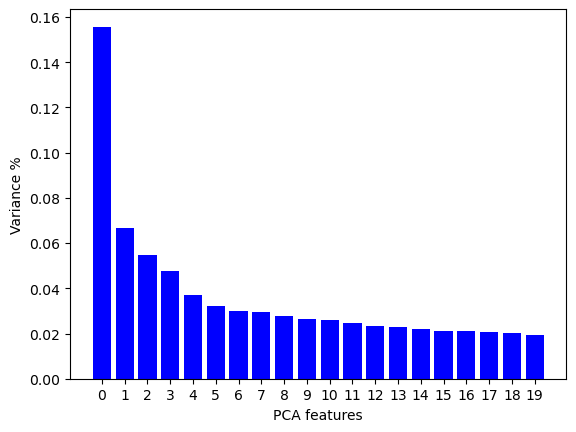

In [87]:
# Plot the explained variances
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)
#plt.savefig('explained_variance_ratioMCBaC_EndoOnly.png', dpi=400, bbox_inches = "tight")
plt.show()

In [88]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

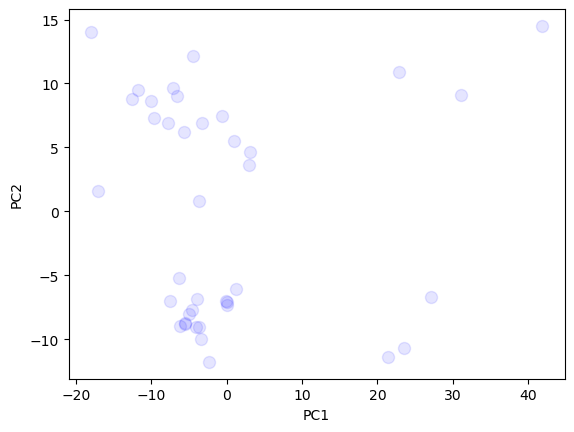

In [89]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='blue', s=75)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('1RawPCA_plot_Neg_BatchCorr_avg_BH-ORP.png', dpi=400, bbox_inches = "tight")
plt.show()

C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

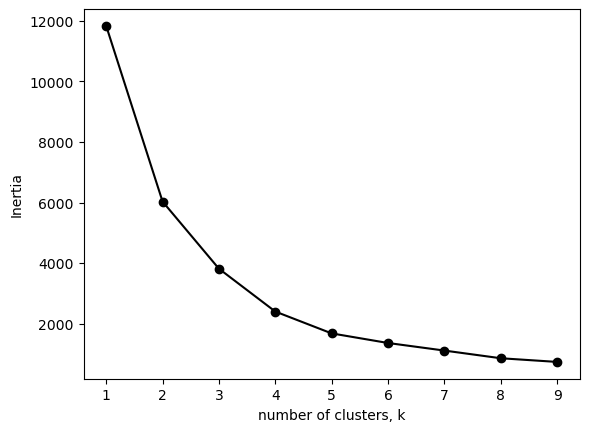

In [90]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
#plt.savefig('elbow_method_MCBaC_EndoOnly.png', dpi=400, bbox_inches = "tight")
plt.show()

In [91]:
from sklearn.cluster import KMeans

kmeans4 = KMeans(n_clusters=4)
y_kmeans4 =kmeans4.fit_predict(PCA_components)
print(y_kmeans4)

C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 1 3 3 1 3
 3 1]


In [92]:
PCA_components.columns = ['PC'+ str(col) for col in PCA_components.columns]

In [93]:
PCA_components = PCA_components.reset_index(drop=True)
df12 = df12.reset_index(drop=True)

In [94]:
PCA_components = pd.concat([PCA_components, df12], axis=1)

In [95]:
PCA_components

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,color_MC,color_LowConc,color_LowMot,color_LowMorph,color_LowCount,color_PoorMotMorph,color_highORP,color_None,color_Inst
0,21.401821,-11.386269,22.321288,3.468370,-6.366518,7.741388,-7.443628,12.872281,6.921880,-8.257056,...,-0.989460,deeppink,darkgray,green,darkgray,darkgray,yellow,red,orangered,silver
1,23.552740,-10.674587,18.242736,-3.380042,4.342930,10.955969,17.853862,-11.239235,-9.414823,6.497765,...,2.036910,deeppink,orange,darkgray,chartreuse,purple,yellow,red,orangered,silver
2,27.145457,-6.693372,8.064951,5.692950,4.580906,-8.825564,-12.099889,-12.667766,-7.331422,-9.520833,...,-2.889549,deeppink,orange,darkgray,chartreuse,purple,yellow,red,orangered,silver
3,41.835818,14.498580,-9.676940,5.417423,13.291570,-10.405097,7.243544,10.580665,3.182482,3.698323,...,1.969306,gray,darkgray,darkgray,darkgray,darkgray,darkgray,red,orangered,silver
4,22.867850,10.867818,6.668217,-0.122932,-1.713484,-1.197301,-11.925817,0.665995,-5.488915,15.108651,...,-1.191827,deeppink,orange,green,chartreuse,purple,yellow,red,orangered,silver
5,31.120418,9.122779,-10.996592,0.977623,-11.670313,13.312956,4.173297,2.729966,9.742851,-7.526835,...,2.041921,gray,darkgray,darkgray,darkgray,darkgray,darkgray,red,orangered,silver
6,-3.897090,-6.851399,-0.377987,2.773992,-2.778460,-6.453613,2.299732,-2.093798,-1.740912,-5.147189,...,13.482895,deeppink,darkgray,green,darkgray,darkgray,yellow,darkgray,orangered,silver
7,-0.088052,-7.003051,-5.773269,2.061562,4.132364,-0.540421,-3.546779,-8.790023,6.116346,-4.465836,...,7.355016,deeppink,orange,darkgray,darkgray,darkgray,darkgray,darkgray,orangered,silver
8,-6.265567,-5.214679,2.780762,3.510614,-2.467165,-3.294911,1.073566,-8.068293,17.029281,8.350183,...,-2.759164,deeppink,darkgray,green,darkgray,darkgray,yellow,darkgray,orangered,silver
9,-5.519524,-8.812314,-9.844633,-0.060645,13.753524,17.076251,-12.379247,2.951981,-6.833376,6.836515,...,-0.550862,dodgerblue,darkgray,darkgray,darkgray,darkgray,darkgray,darkgray,black,silver


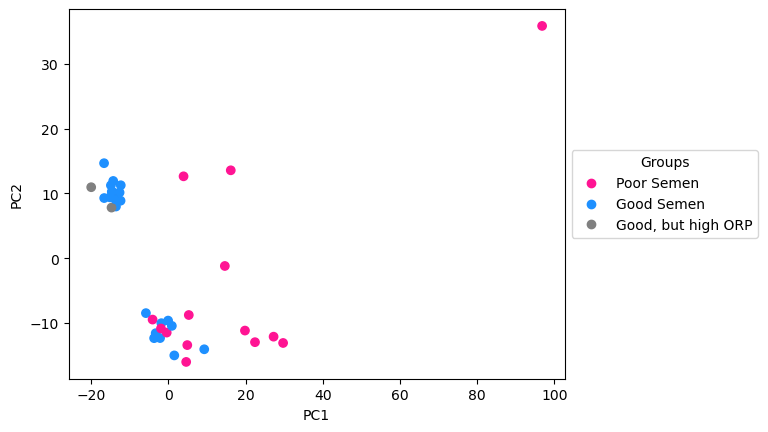

In [91]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='deeppink', marker='o', lw=0),
                Line2D([0], [0], color='dodgerblue', marker='o', lw=0),
                Line2D([0], [0], color='gray', marker='o', lw=0)]

fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_MC'])
legend1 = ax.legend(custom_lines, ['Poor Semen', 'Good Semen', 'Good, but high ORP'], #, 'Blank', 'Other (QC)'],
                title="Groups", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_PoorSemen_Batch_avg_BH-.png', dpi=400, bbox_inches = "tight")

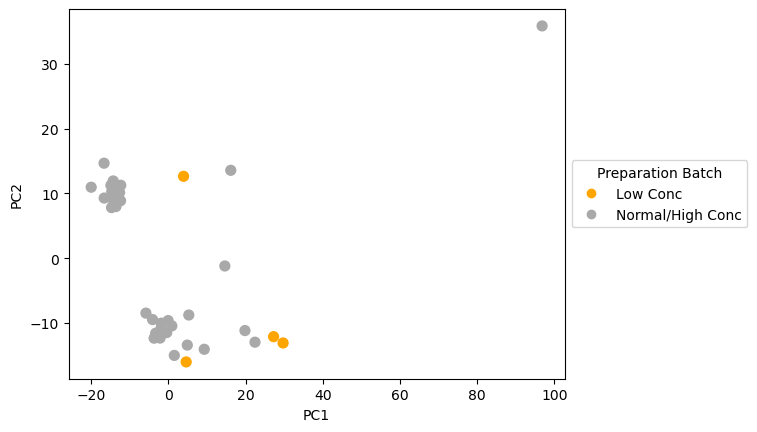

In [92]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', marker='o', lw=0),
                Line2D([0], [0], color='darkgray', marker='o', lw=0)]

fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_LowConc'], s=50)
legend1 = ax.legend(custom_lines, ['Low Conc', 'Normal/High Conc'],
                title="Preparation Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_LowConc_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")


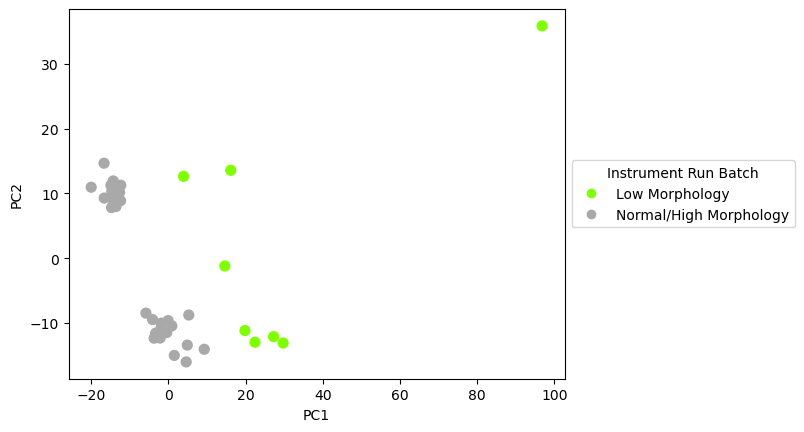

In [93]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='chartreuse', marker='o', lw=0),
                Line2D([0], [0], color='darkgray', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_LowMorph'], s=50)
legend1 = ax.legend(custom_lines, ['Low Morphology', 'Normal/High Morphology'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_LowMorph_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

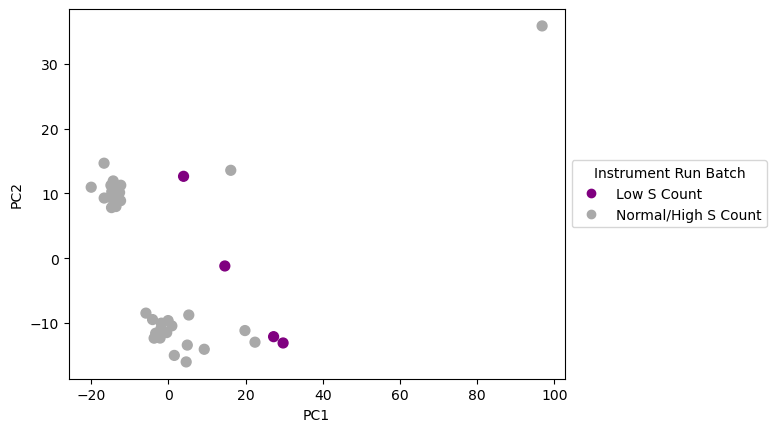

In [94]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='purple', marker='o', lw=0),
                Line2D([0], [0], color='darkgray', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_LowCount'], s=50)
legend1 = ax.legend(custom_lines, ['Low S Count', 'Normal/High S Count'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_LowCount_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

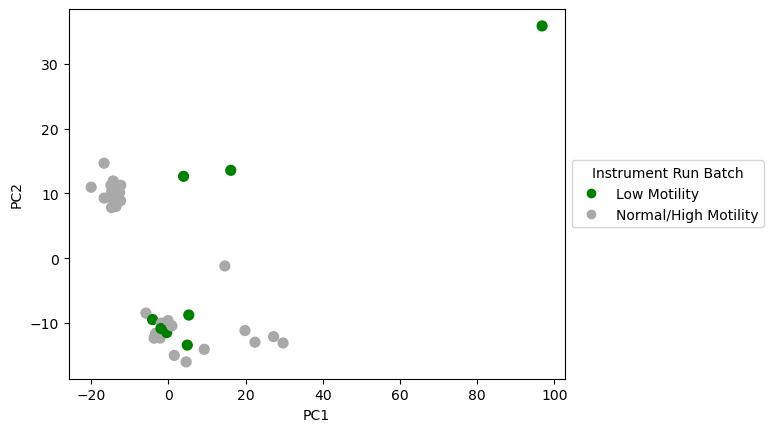

In [95]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='green', marker='o', lw=0),
                Line2D([0], [0], color='darkgray', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_LowMot'], s=50)
legend1 = ax.legend(custom_lines, ['Low Motility', 'Normal/High Motility'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_LowMot_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

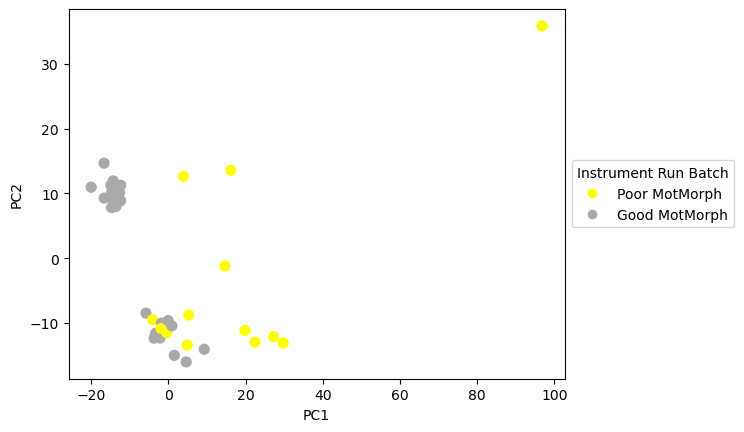

In [96]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='yellow', marker='o', lw=0),
                Line2D([0], [0], color='darkgray', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_PoorMotMorph'], s=50)
legend1 = ax.legend(custom_lines, ['Poor MotMorph', 'Good MotMorph'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_PoorMotMorph_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

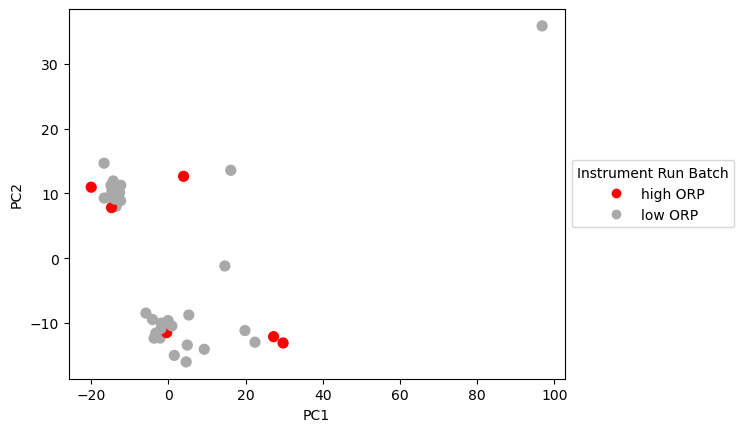

In [97]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', marker='o', lw=0),
                Line2D([0], [0], color='darkgray', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_highORP'], s=50)
legend1 = ax.legend(custom_lines, ['high ORP', 'low ORP'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_highORP_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

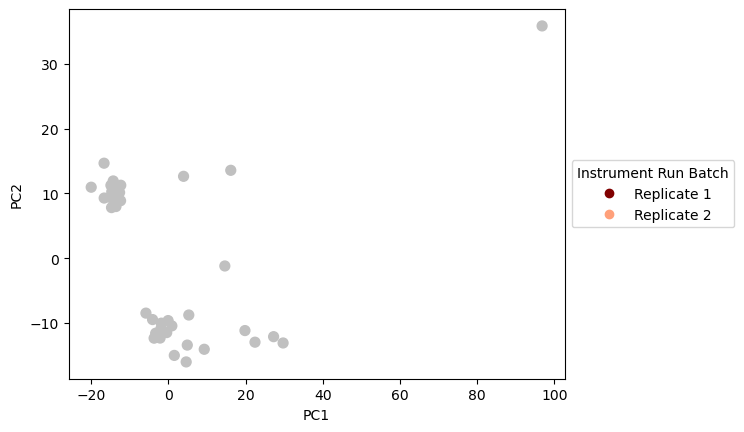

In [98]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='maroon', marker='o', lw=0),
                Line2D([0], [0], color='lightsalmon', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_Inst'], s=50)
legend1 = ax.legend(custom_lines, ['Replicate 1', 'Replicate 2'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_Replicates_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

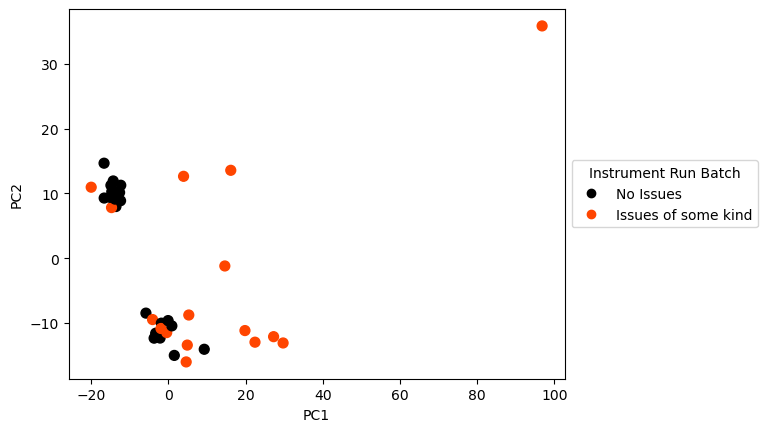

In [99]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', marker='o', lw=0),
                Line2D([0], [0], color='orangered', marker='o', lw=0)]
       
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=PCA_components['color_None'], s=50)
legend1 = ax.legend(custom_lines, ['No Issues', 'Issues of some kind'],
                title="Instrument Run Batch", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('PCA_Neg_blankless_IssuesOrNah_Batch_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

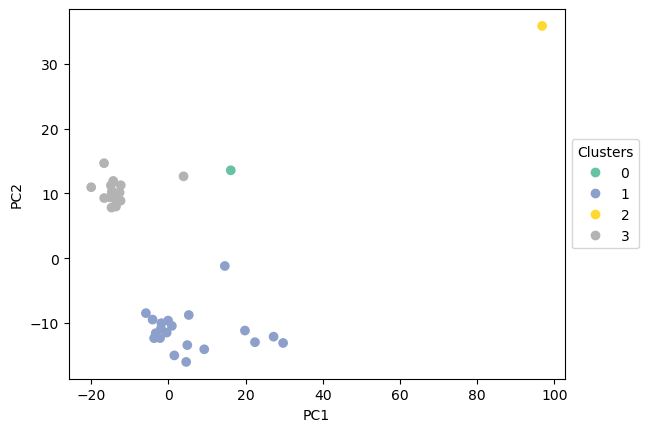

In [100]:
fig, ax = plt.subplots()
scatter = plt.scatter(PCA_components['PC0'], PCA_components['PC1'], c=y_kmeans4, cmap = 'Set2')
legend1 = ax.legend(*scatter.legend_elements(),
                title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
scatter.figure.savefig('ClustersMC_CornellPos-30000_blankless_BatchCorr_4Clusters_Neg_avg_BH-LMH.png', dpi=400, bbox_inches = "tight")

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [102]:
#df = PCA_components
#df['color_batch'] = df['color_batch'].str.replace('darkgray','1')
#df['color_batch'] = df['color_batch'].str.replace('dodgerblue','2')

#x = "color_batch"
#y = "PC0"
#my_pal = {"1": "darkgray", "2": "dodgerblue"}
#order = ['1', '2']
#ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=my_pal) 
#plt.xlabel('Shipment')
#plt.ylabel('PC1')
#add_stat_annotation(ax, data=df, x=x, y=y, order=order,
#                    box_pairs=[("1", "2")],
#                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
#.savefig('boxplot_BaC_B12.png', dpi=400, bbox_inches = "tight")

In [36]:
PCA_components.tail()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,color_MC,color_LowConc,color_LowMot,color_LowMorph,color_LowCount,color_PoorMotMorph,color_highORP,color_None,color_Inst
35,-75.006368,8.295732,-1.004175,17.636804,-7.124613,5.014750,14.797667,-26.781878,-14.545209,3.914297,...,-22.601372,dodgerblue,darkgray,darkgray,darkgray,darkgray,darkgray,darkgray,black,silver
36,57.854619,23.457589,42.085917,57.838126,30.989563,15.453471,-50.262387,-18.759860,161.102986,-19.145398,...,-5.069745,gray,darkgray,darkgray,darkgray,darkgray,darkgray,red,orangered,silver
37,-65.659008,6.159978,2.703935,4.487879,-1.318468,-0.468478,-3.605454,-1.319000,6.195980,0.370494,...,3.094753,dodgerblue,darkgray,darkgray,darkgray,darkgray,darkgray,darkgray,black,silver
38,-65.665439,-24.486615,17.366391,-18.863996,24.833515,-1.954037,3.601122,8.211001,-40.411589,23.647774,...,22.834483,dodgerblue,darkgray,darkgray,darkgray,darkgray,darkgray,darkgray,black,silver
39,98.838600,-25.309702,-26.453217,-83.844613,-2.980103,-6.985397,-97.320324,57.983928,21.126576,94.167014,...,-7.820889,deeppink,darkgray,darkgray,chartreuse,purple,yellow,darkgray,orangered,silver


In [96]:
PCA_components.to_csv('1_ORP_PCAcomp_Neg.csv', index=False)

C:\Users\JOHNST47\AppData\Local\Temp\ipykernel_20736\561780000.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=my_pal)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\statannot\statannot.py:555: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\statannot\statannot.py:557: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'simple':
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\statannot\statannot.py:555: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\statannot\statannot.py:557: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'simple':
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\statannot\statannot.py:555: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif text_format is 'star':
C:\Users\JOHNST47\AppData\Local\anaconda3\Lib\site-packages\statannot\statannot.py:557: SyntaxWarning: "is" with a literal. Did you

AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

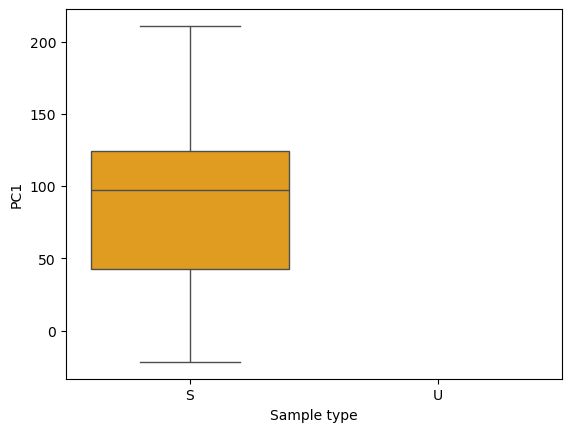

In [90]:
df = PCA_components
df['color_MC'] = df['color_MC'].str.replace('orange','S')
df['color_MC'] = df['color_MC'].str.replace('dodgerblue','U')

x = df["color_MC"]
y = df["PC0"]
my_pal = {"S": "orange", "U": "dodgerblue"}
order = ['S', 'U']
ax = sns.boxplot(data=df, x=x, y=y, order=order, palette=my_pal) 
plt.xlabel('Sample type')
plt.ylabel('PC1')
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("S", "U")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('boxplot_PCAcomp_FullSet.png', dpi=400, bbox_inches = "tight")